# Beach Weather

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [ ]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

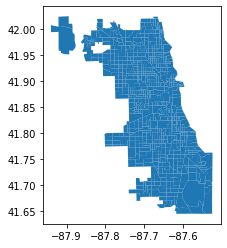

In [ ]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [ ]:
beach_api = 'https://data.cityofchicago.org/resource/g3ip-u8rb.json'
beach_weather = pd.read_json(beach_api)

In [ ]:
beach_weather.head()

,sensor_name,sensor_type,latitude,longitude,location,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
0,63rd Street Beach,Water,41.784561,-87.571453,"{'latitude': '41.784561', 'longitude': '-87.57...",22260,469,NaN,NaN,NaN
1,Calumet Beach,Water,41.714739,-87.527356,"{'latitude': '41.714739', 'longitude': '-87.52...",21202,705,NaN,NaN,NaN
2,Montrose Beach,Water,41.969094,-87.638003,"{'latitude': '41.969094', 'longitude': '-87.63...",21186,636,NaN,NaN,NaN
3,Ohio Street Beach,Water,41.894328,-87.613083,"{'latitude': '41.894328', 'longitude': '-87.61...",21182,159,NaN,NaN,NaN
4,Osterman Beach,Water,41.987675,-87.651008,"{'latitude': '41.987675', 'longitude': '-87.65...",4451,14,NaN,NaN,NaN


In [ ]:
beach_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sensor_name                  9 non-null      object 
 1   sensor_type                  9 non-null      object 
 2   latitude                     9 non-null      float64
 3   longitude                    9 non-null      float64
 4   location                     9 non-null      object 
 5   :@computed_region_6mkv_f3dw  9 non-null      int64  
 6   :@computed_region_bdys_3d7i  9 non-null      int64  
 7   :@computed_region_awaf_s7ux  3 non-null      float64
 8   :@computed_region_vrxf_vc4k  3 non-null      float64
 9   :@computed_region_43wa_7qmu  3 non-null      float64
dtypes: float64(5), int64(2), object(3)
memory usage: 848.0+ bytes


In [ ]:
beach_weather.describe()

,latitude,longitude,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
count,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,3.000000
mean,41.863333,-87.599327,19875.222222,401.444444,31.333333,25.666667,20.000000
std,0.104650,0.045175,5817.828456,251.990134,9.018500,14.742230,11.532563
min,41.714739,-87.651008,4451.000000,14.000000,22.000000,9.000000,11.000000
25%,41.780992,-87.638003,21182.000000,159.000000,27.000000,20.000000,13.500000
50%,41.894328,-87.613083,21202.000000,469.000000,32.000000,31.000000,16.000000
75%,41.969094,-87.571453,22260.000000,635.000000,36.000000,34.000000,24.500000
max,41.987675,-87.527356,22616.000000,705.000000,40.000000,37.000000,33.000000


In [ ]:
location_null = beach_weather['latitude'].isnull().sum()
print(location_null)

0


In [ ]:
beach_weather_geo = gpd.GeoDataFrame(beach_weather, geometry = gpd.points_from_xy(beach_weather.longitude, beach_weather.latitude))

Text(0.5, 1.0, 'Beach weather sensor in Chicago')

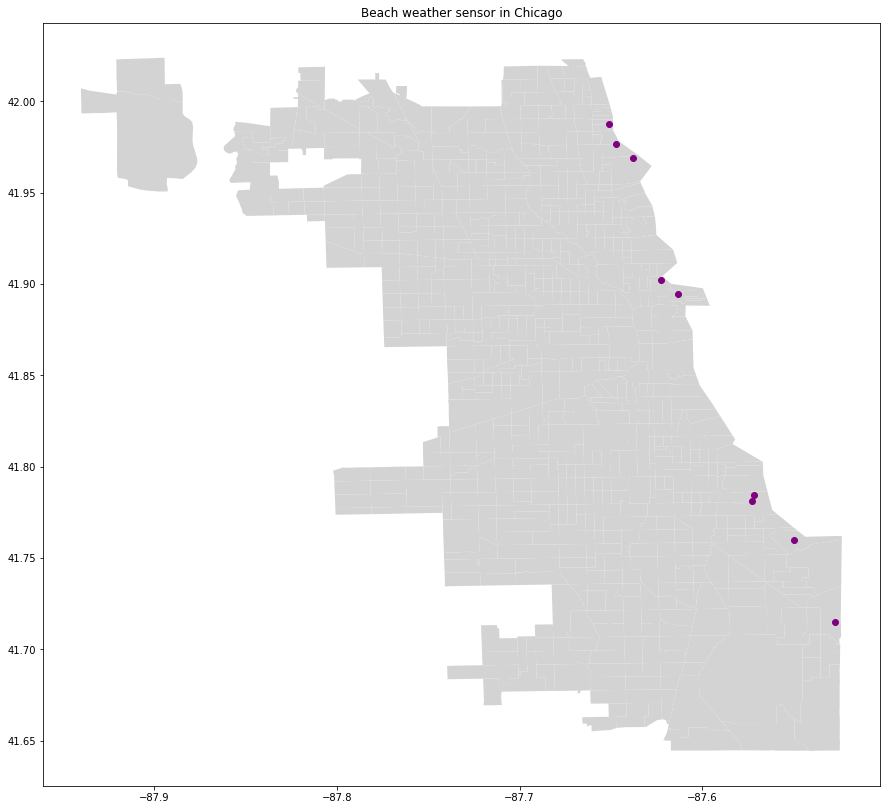

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
beach_weather_geo.plot(ax = ax, color = 'purple')
ax.set_title('Beach weather sensor in Chicago')